In [ ]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/prediction-of-h1n1-vaccination/submission.csv
/kaggle/input/prediction-of-h1n1-vaccination/train_labels.csv
/kaggle/input/prediction-of-h1n1-vaccination/train.csv
/kaggle/input/prediction-of-h1n1-vaccination/test.csv


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/input/prediction-of-h1n1-vaccination/train.csv')
test = pd.read_csv('/content/drive/MyDrive/input/prediction-of-h1n1-vaccination/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/input/prediction-of-h1n1-vaccination/submission.csv')
train.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,employment_status,census_region,census_msa,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,4,"MSA, Not Principle City",2.0,3.0,5.0,NaN,NaN,9,CALIFORNIA
1,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Employed,2,"MSA, Principle City",1.0,0.0,1.0,Accommodation and Food Services Industries,Food Preparation and Serving Related Occupations,7,NEBRASKA
2,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Employed,1,"MSA, Not Principle City",1.0,2.0,3.0,Transportation and Warehousing Industries,Transportation and Material Moving Occupations,1,MASSACHUSETTS
3,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Employed,3,"MSA, Not Principle City",2.0,2.0,4.0,"Professional, Scientific, and Technical Servic...",Legal Occupations,6,LOUISIANA
4,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Employed,3,"MSA, Not Principle City",3.0,0.0,3.0,Education Services Industries,Office and Administrative Support Occupations,4,ALABAMA


# EDA

In [ ]:
train.info

<bound method DataFrame.info of        h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               NaN             NaN                        NaN   
1               3.0             1.0                        0.0   
2               2.0             1.0                        0.0   
3               2.0             2.0                        1.0   
4               1.0             2.0                        0.0   
...             ...             ...                        ...   
42149           2.0             2.0                        0.0   
42150           2.0             2.0                        0.0   
42151           1.0             1.0                        0.0   
42152           2.0             2.0                        0.0   
42153           NaN             NaN                        NaN   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       NaN                   NaN                    NaN   
1                      

In [ ]:
# check missing value
train.isnull().sum()

h1n1_concern                    8420
h1n1_knowledge                  8420
behavioral_antiviral_meds       8519
behavioral_avoidance            8672
behavioral_face_mask            8444
behavioral_wash_hands           8471
behavioral_large_gatherings     8514
behavioral_outside_home         8521
behavioral_touch_face           8583
doctor_recc_h1n1                1885
doctor_recc_seasonal            1885
chronic_med_condition           1317
child_under_6_months            9449
health_insurance               19421
health_worker                   9430
opinion_h1n1_vacc_effective     8779
opinion_h1n1_risk               8825
opinion_h1n1_sick_from_vacc     8869
opinion_seas_vacc_effective     8934
opinion_seas_risk               9001
opinion_seas_sick_from_vacc     9065
agegrp                             0
education_comp                 10166
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                        10199
r

In [ ]:
!pip install autoviz
!pip install xlrd

     |████████████████████████████████| 44 kB 252 kB/s 
     |████████████████████████████████| 96 kB 725 kB/s 


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (42154, 38)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  9
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  15
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    38 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables
7 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 28


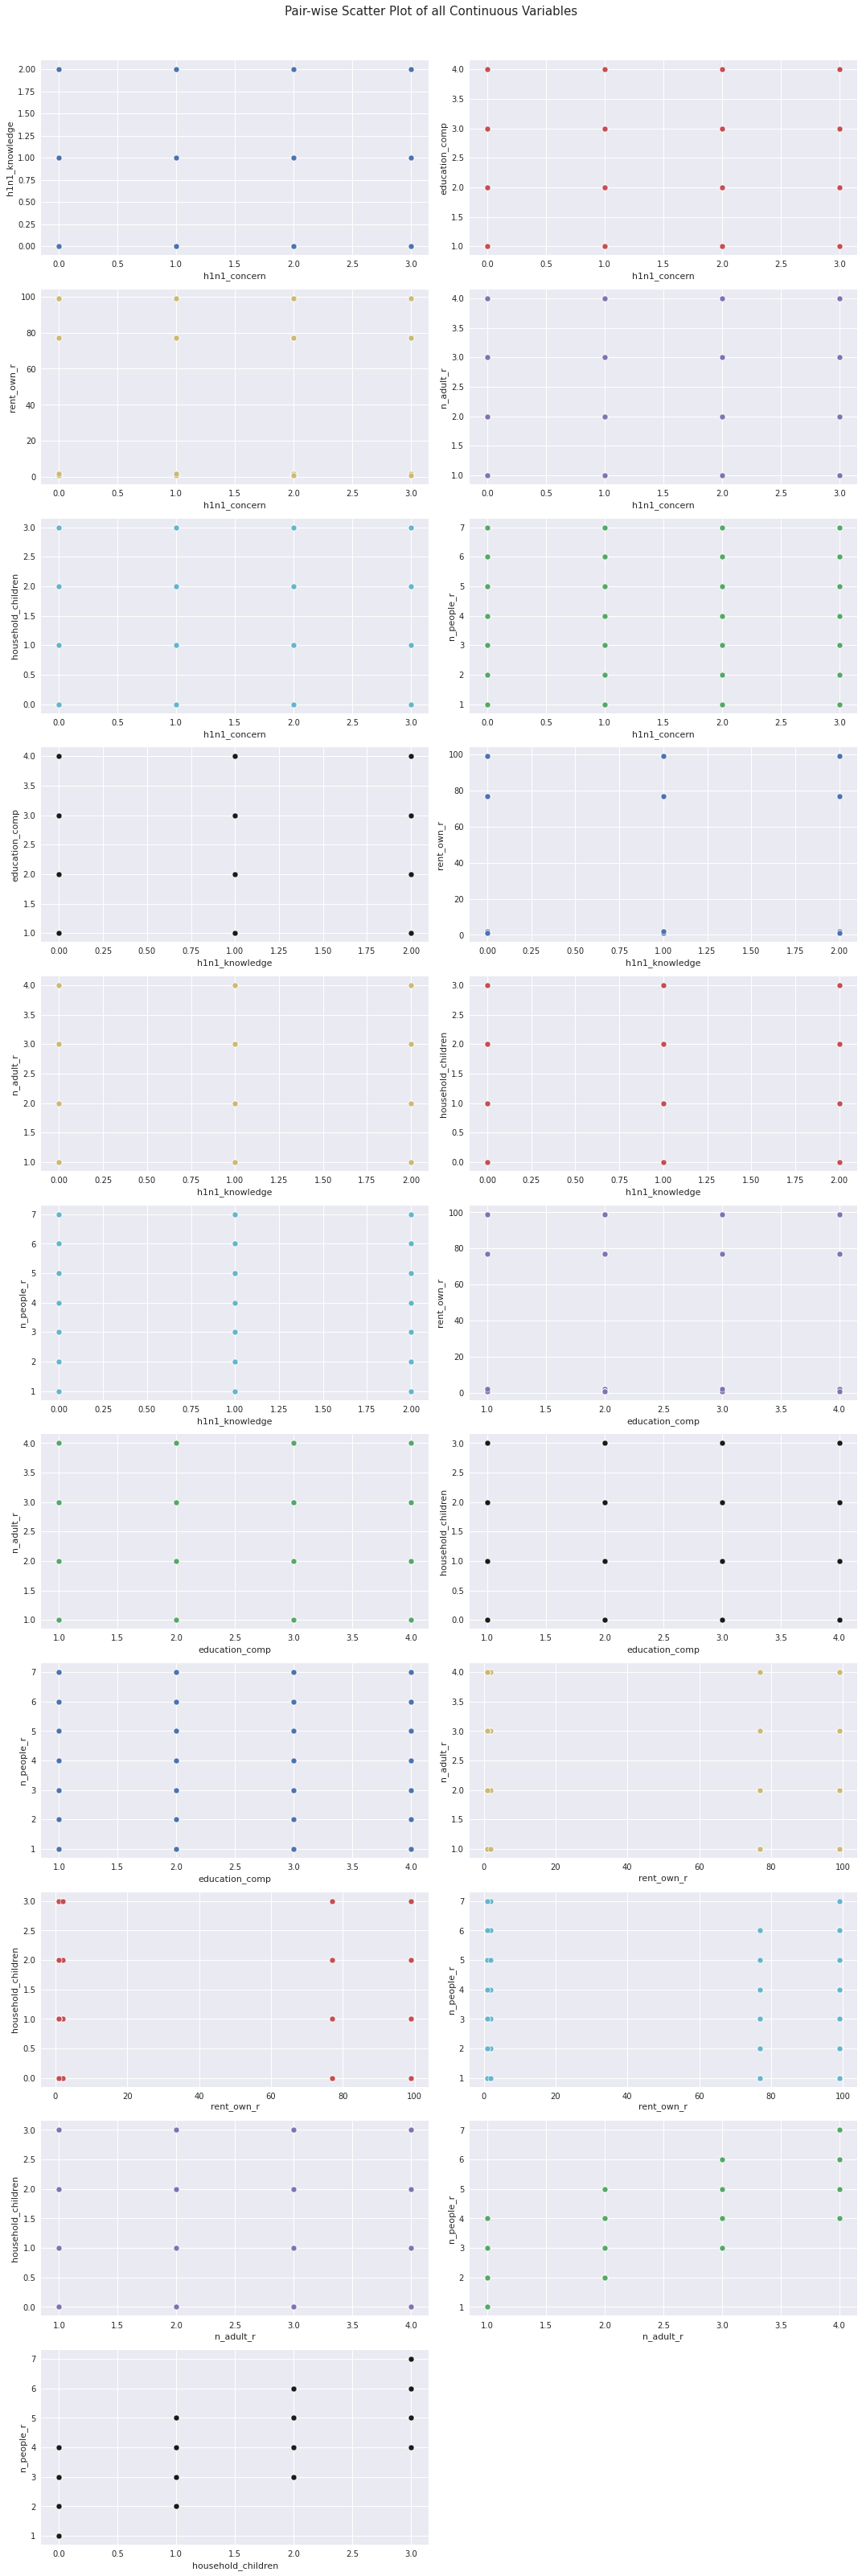

Could not draw Distribution Plot


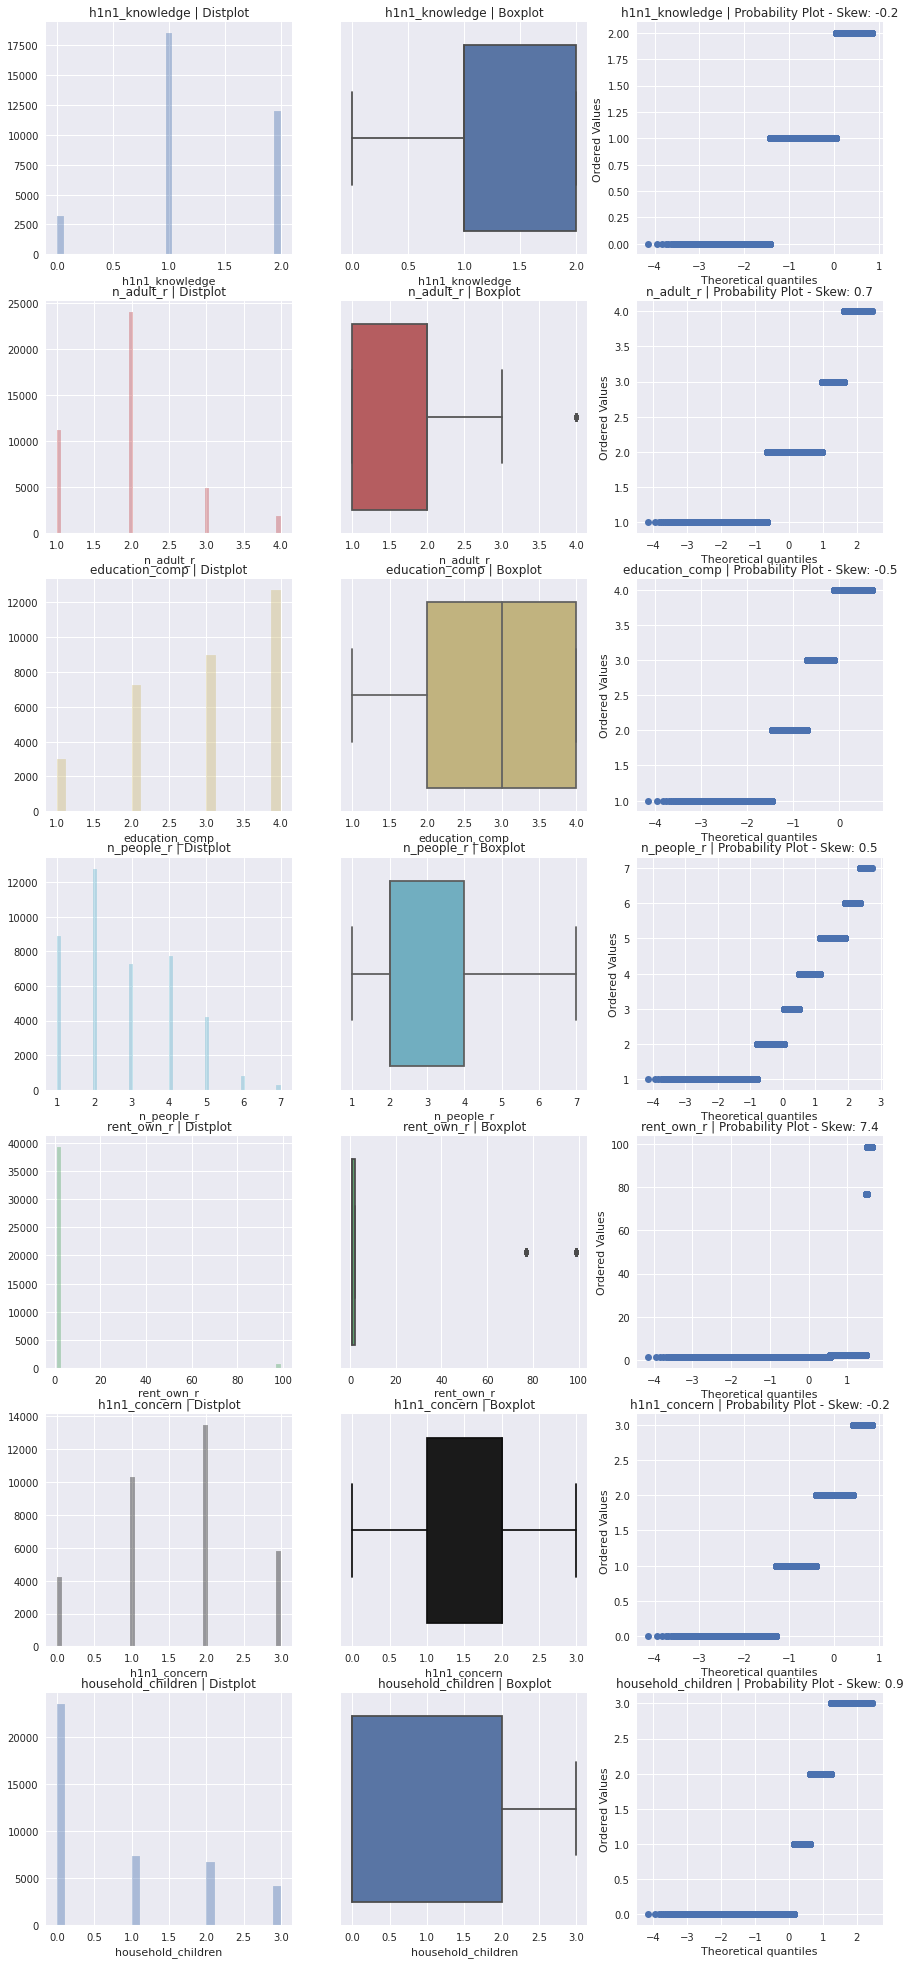

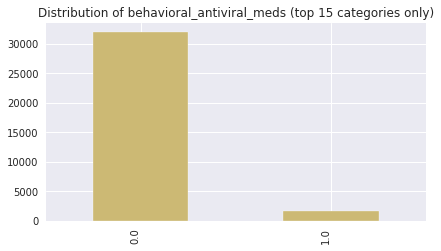

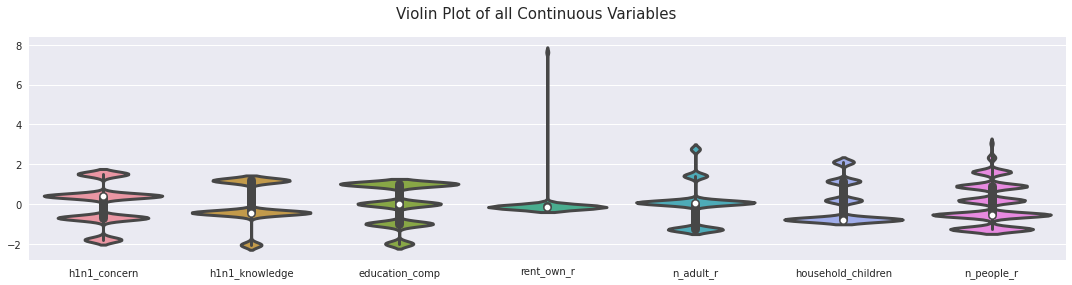

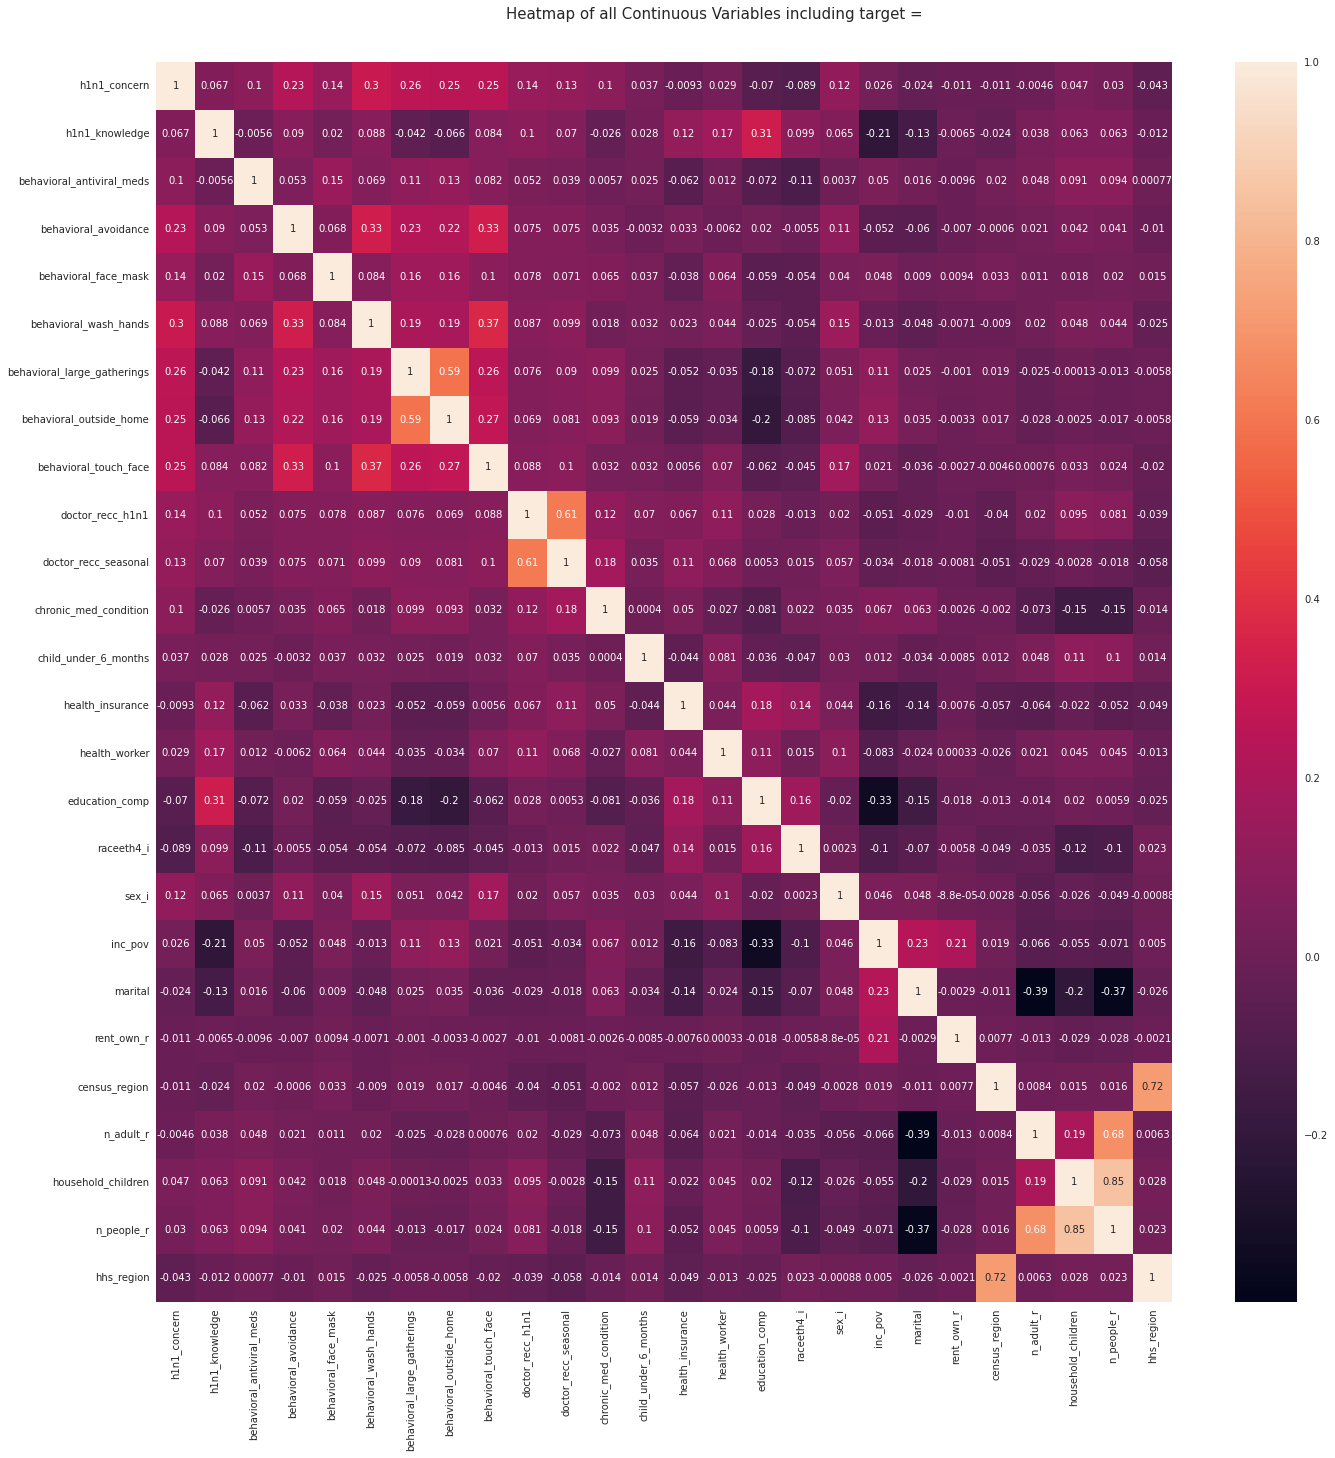

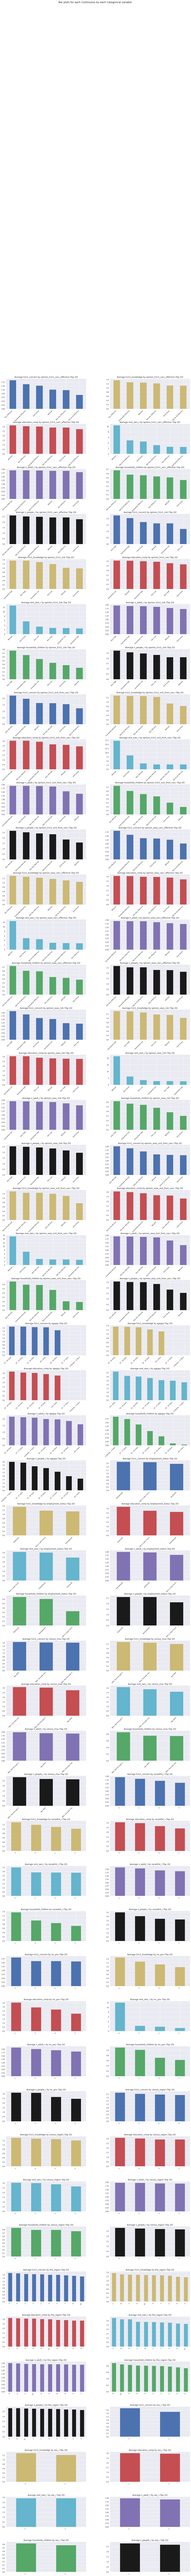

Time to run AutoViz (in seconds) = 33.968

 ###################### VISUALIZATION Completed ########################


In [ ]:
filename = '/content/drive/MyDrive/input/prediction-of-h1n1-vaccination/train.csv'
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg"
)